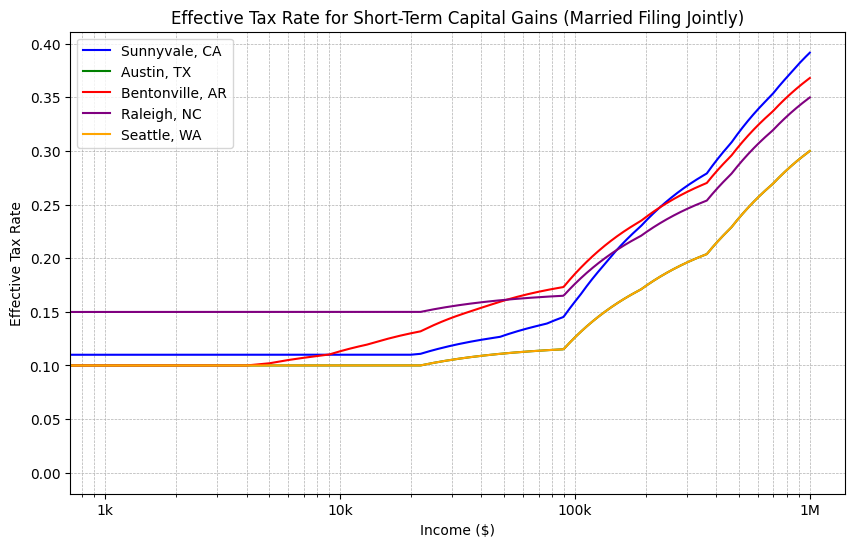

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Federal tax brackets (married filing jointly) for 2023
federal_brackets = [
    (0, 22000, 0.10),
    (22000, 89450, 0.12),
    (89450, 190750, 0.22),
    (190750, 364200, 0.24),
    (364200, 462500, 0.32),
    (462500, 693750, 0.35),
    (693750, 1_000_000, 0.37)
]

# California state tax brackets (married filing jointly) for 2023
california_brackets = [
    (0, 20198, 0.01),
    (20198, 47884, 0.02),
    (47884, 75576, 0.04),
    (75576, 104910, 0.06),
    (104910, 132590, 0.08),
    (132590, 677278, 0.093),
    (677278, 812728, 0.103),
    (812728, 1354550, 0.113),
    (1354550, 1_000_000, 0.123)
]

# Texas has no state income tax
texas_brackets = [
    (0, 1_000_000, 0.00)
]

# Arkansas state tax brackets (married filing jointly) for 2023
arkansas_brackets = [
    (0, 4499, 0.00),
    (4500, 8899, 0.02),
    (8900, 13299, 0.04),
    (13300, 22199, 0.05),
    (22200, 37299, 0.06),
    (37300, 45099, 0.066),
    (45100, 1_000_000, 0.069)
]

# North Carolina state tax rate for 2023 (flat rate)
north_carolina_brackets = [
    (0, 1_000_000, 0.0499)
]

# Washington state has no state income tax
washington_brackets = [
    (0, 1_000_000, 0.00)
]

# Function to calculate effective tax rate
def calculate_effective_tax_rate(income, brackets):
    if income == 0:
        return 0  # To avoid division by zero
    tax = 0
    for lower, upper, rate in brackets:
        if income > upper:
            tax += (upper - lower) * rate
        else:
            tax += (income - lower) * rate
            break
    return tax / income

# Income range
incomes = np.linspace(0, 1_000_000, 1000)

# Calculate effective tax rates for each income in each location
effective_tax_rates = []
effective_tax_rates_texas = []
effective_tax_rates_arkansas = []
effective_tax_rates_north_carolina = []
effective_tax_rates_washington = []

for income in incomes:
    # Sunnyvale, CA
    federal_tax = calculate_effective_tax_rate(income, federal_brackets)
    california_tax = calculate_effective_tax_rate(income, california_brackets)
    combined_tax_rate = federal_tax + california_tax
    effective_tax_rates.append(combined_tax_rate)
    
    # Austin, TX
    texas_tax = calculate_effective_tax_rate(income, texas_brackets)
    combined_tax_rate_texas = federal_tax + texas_tax
    effective_tax_rates_texas.append(combined_tax_rate_texas)
    
    # Bentonville, AR
    arkansas_tax = calculate_effective_tax_rate(income, arkansas_brackets)
    combined_tax_rate_arkansas = federal_tax + arkansas_tax
    effective_tax_rates_arkansas.append(combined_tax_rate_arkansas)
    
    # Raleigh, NC
    north_carolina_tax = calculate_effective_tax_rate(income, north_carolina_brackets)
    combined_tax_rate_north_carolina = federal_tax + north_carolina_tax
    effective_tax_rates_north_carolina.append(combined_tax_rate_north_carolina)
    
    # Seattle, WA
    washington_tax = calculate_effective_tax_rate(income, washington_brackets)
    combined_tax_rate_washington = federal_tax + washington_tax
    effective_tax_rates_washington.append(combined_tax_rate_washington)

# Plot the effective tax rate for all scenarios with logarithmic scale
plt.figure(figsize=(10, 6))
plt.plot(incomes, effective_tax_rates, label='Sunnyvale, CA', color='blue')
plt.plot(incomes, effective_tax_rates_texas, label='Austin, TX', color='green')
plt.plot(incomes, effective_tax_rates_arkansas, label='Bentonville, AR', color='red')
plt.plot(incomes, effective_tax_rates_north_carolina, label='Raleigh, NC', color='purple')
plt.plot(incomes, effective_tax_rates_washington, label='Seattle, WA', color='orange')
plt.title('Effective Tax Rate for Short-Term Capital Gains (Married Filing Jointly)')
plt.xlabel('Income ($)')
plt.ylabel('Effective Tax Rate')
plt.xscale('log')
plt.xticks([1000, 10000, 100000, 1000000], ['1k', '10k', '100k', '1M'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()